'\nimg = img.reshape(1,img.shape[0],img.shape[1],img.shape[2])  #3D->4D\nprint(img.shape)\nplot_images_grid(img, 1, 6)\n'

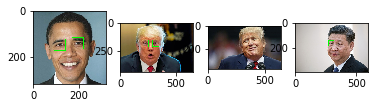

In [39]:
import Ipynb_importer
from iris_segmentation import plot_images_grid,read_dataset
import numpy as np
import cv2
from matplotlib import pyplot as plt

eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eye_cascade.load('C:/Users/steph/Anaconda3/Library/etc/haarcascades/haarcascade_eye.xml')

images = read_dataset('./dataset/face/',"jpg")
for i, img in enumerate(images):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    eyes = eye_cascade.detectMultiScale(gray, 1.2, 3)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(img, (ex, ey),(ex+ew, ey+eh), (0, 255, 0), 2)
    plt.subplot(1,4,i+1)
    img2 = img[:,:,::-1] # 必须为 ::-1
    plt.imshow(img2)  

'''
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''
'''
img = img.reshape(1,img.shape[0],img.shape[1],img.shape[2])  #3D->4D
print(img.shape)
plot_images_grid(img, 1, 6)
'''

In [58]:
import numpy as np
import cv2

# face
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_cascade.load('C:/Users/steph/Anaconda3/Library/etc/haarcascades/haarcascade_frontalface_default.xml')
# eye
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eye_cascade.load('C:/Users/steph/Anaconda3/Library/etc/haarcascades/haarcascade_eye.xml')
# mouth
mouth_cascade = cv2.CascadeClassifier('haarcascade_mcs_mouth.xml')
mouth_cascade.load('E:/Z-software/toolbox/vision/visionutilities/classifierdata/cascade/haar/haarcascade_mcs_mouth.xml')
# nose
nose_cascade = cv2.CascadeClassifier('haarcascade_mcs_nose.xml')
nose_cascade.load('E:/Z-software/toolbox/vision/visionutilities/classifierdata/cascade/haar/haarcascade_mcs_nose.xml')



img = cv2.imread('./dataset/face/f2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#face
faces = face_cascade.detectMultiScale(gray, 1.2, 3)
for (x, y, w, h) in faces:
     img = cv2.rectangle(img, (x,y),(x+w, y+h), (255, 0, 0), 2)
     roi_gray = gray[y:y+h, x:x+w]
     roi_color = img[y:y+h, x:x+w]
     #eye
     eyes = eye_cascade.detectMultiScale(roi_gray, 1.2, 3)
     for (ex,ey,ew,eh) in eyes:
         cv2.rectangle(roi_color, (ex, ey),(ex+ew, ey+eh), (0, 255, 0), 2)
     #mouth
     '''
     mouth = mouth_cascade.detectMultiScale(roi_gray, 1.5,5)
     for (mx, my, mw, mh) in mouth:
         cv2.rectangle(roi_color, (mx, my), (mx+mw, my+mh), (0, 0, 255), 2)
     '''
     #nose
     nose = nose_cascade.detectMultiScale(roi_gray, 1.2, 5)
     for (nx, ny, nw, nh) in nose:
         cv2.rectangle(roi_color, (nx, ny), (nx+nw, ny+nh), (255, 0, 255), 2)
          
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()